In [5]:
import pandas as pd

df = pd.read_csv('almaty_final_data.csv')

df.head()

,id,district,price,title,addressTitle,square,rooms,ownerName,lat,lon,...,has_change_title,has_change_value,flat.renovation_title,flat.renovation_value,flat.balcony_title,flat.balcony_value,flat.phone_title,flat.phone_value,flat.balcony_g_title,flat.balcony_g_value
0,1000106232,alatauskij,49000000,3-комнатная квартира · 93.4 м² · 4/9 этаж,"мкр Нуркент, Нуркент (Алгабас-1) мкр 36",93.4,3,Krisha.kz,43.256218,76.820958,...,Возможен обмен,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000108754,alatauskij,14500000,1-комнатная квартира · 29 м² · 3/5 этаж,Рыскулова 103,29.0,1,Жанар,43.189356,76.829861,...,Возможен обмен,Нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000116026,alatauskij,35000000,2-комнатная квартира · 76 м² · 1/13 этаж,мкр Нуркент 82 — Рыскулова момышулы,76.0,2,Айман,43.255869,76.818237,...,Возможен обмен,Да,Состояние квартиры,свежий ремонт,Балкон,балкон,Телефон,нет,NaN,NaN
3,1000157188,alatauskij,26000000,2-комнатная квартира · 50.6 м² · 2/2 этаж,Кисловодская 2,50.6,2,Зарина,43.257901,76.858906,...,Возможен обмен,Нет,Состояние квартиры,"не новый, но аккуратный ремонт",NaN,NaN,Телефон,есть возможность подключения,NaN,NaN
4,1000163448,alatauskij,31000000,2-комнатная квартира · 62 м² · 16/16 этаж,"мкр Аккент, Мкр. Аккент 46",62.0,2,Жандаулетова Асем,43.244220,76.812487,...,Возможен обмен,Нет,NaN,NaN,Балкон,лоджия,NaN,NaN,NaN,NaN


In [ ]:
import folium
from folium.plugins import MarkerCluster

almaty_center = [43.238949, 76.889709]

m = folium.Map(location=almaty_center, zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

for _, row in df[['lat', 'lon']].dropna().iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        fill=True,
        fill_opacity=0.7,
        opacity=0.7,
    ).add_to(marker_cluster)

m


In [7]:
len(df)

38174

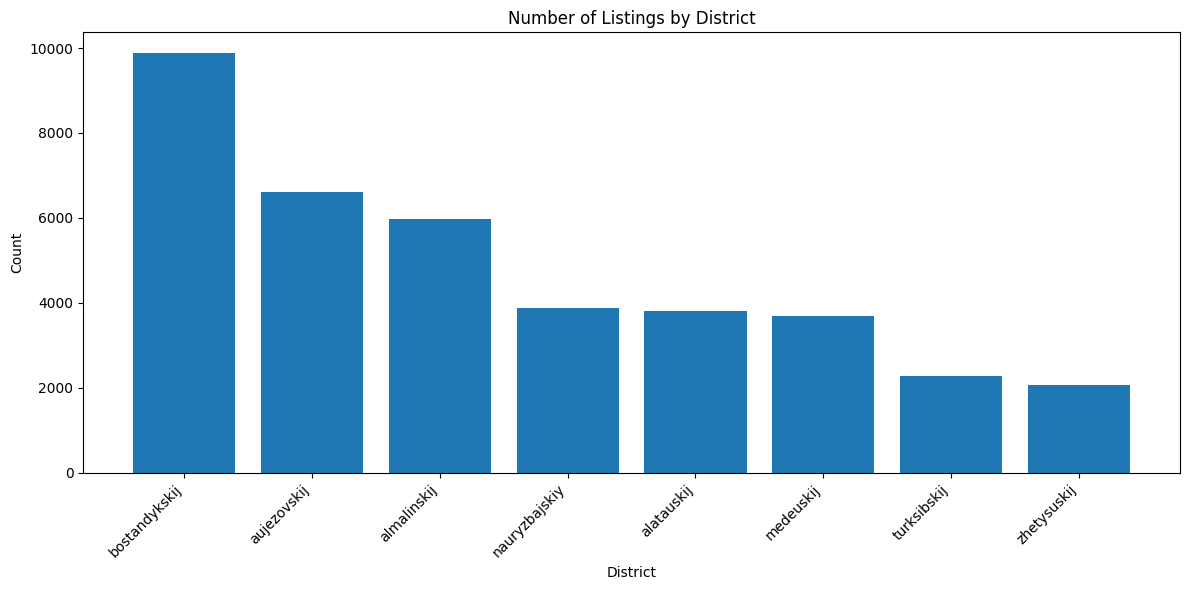

In [9]:
import matplotlib.pyplot as plt

counts = df['district'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Number of Listings by District")
plt.ylabel("Count")
plt.xlabel("District")
plt.tight_layout()
plt.show()

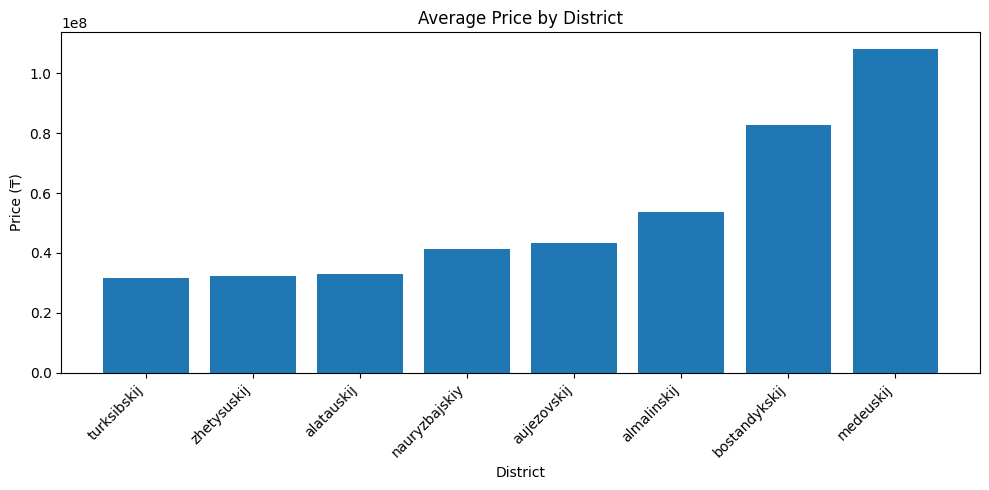

In [10]:
avg_price = df.groupby('district')['price'].mean().sort_values()
plt.figure(figsize=(10,5))
plt.bar(avg_price.index, avg_price.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Price by District")
plt.ylabel("Price (₸)")
plt.xlabel("District")
plt.tight_layout()
plt.show()

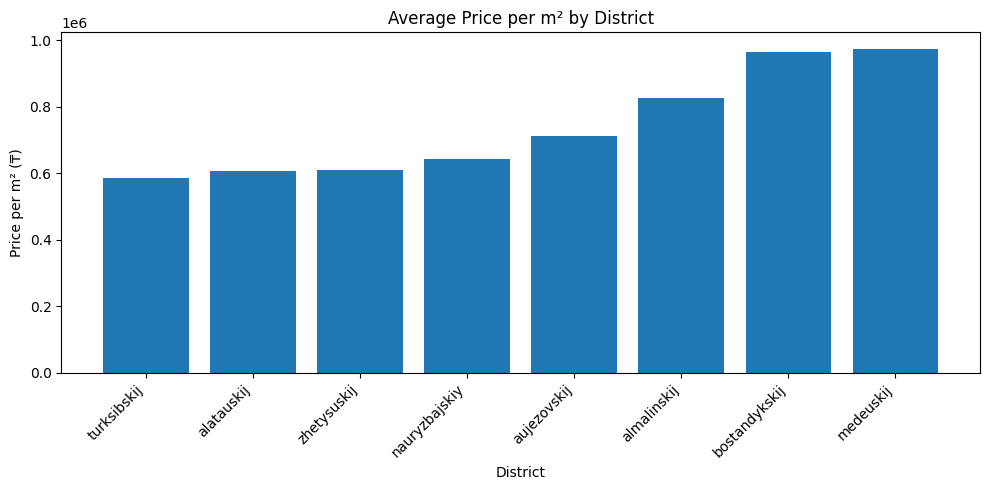

In [11]:
avg_m2 = df.groupby('district')['priceM2'].mean().sort_values()
plt.figure(figsize=(10,5))
plt.bar(avg_m2.index, avg_m2.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Price per m² by District")
plt.ylabel("Price per m² (₸)")
plt.xlabel("District")
plt.tight_layout()
plt.show()

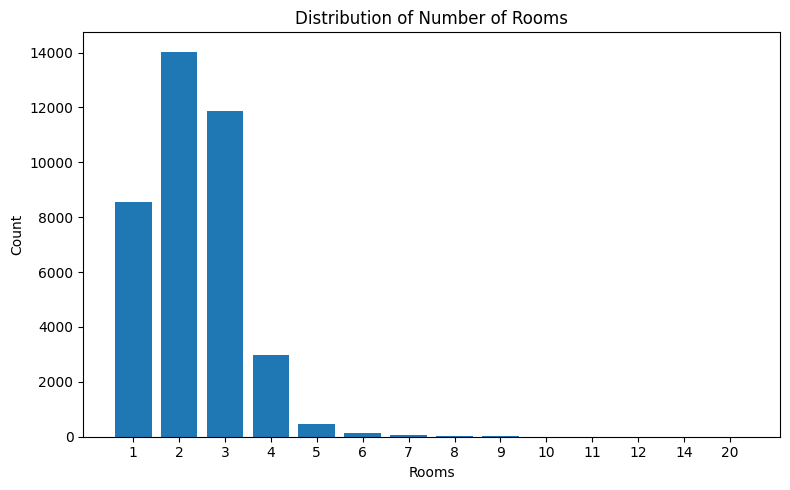

In [12]:
rooms = df['rooms'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(rooms.index.astype(str), rooms.values)
plt.title("Distribution of Number of Rooms")
plt.xlabel("Rooms")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

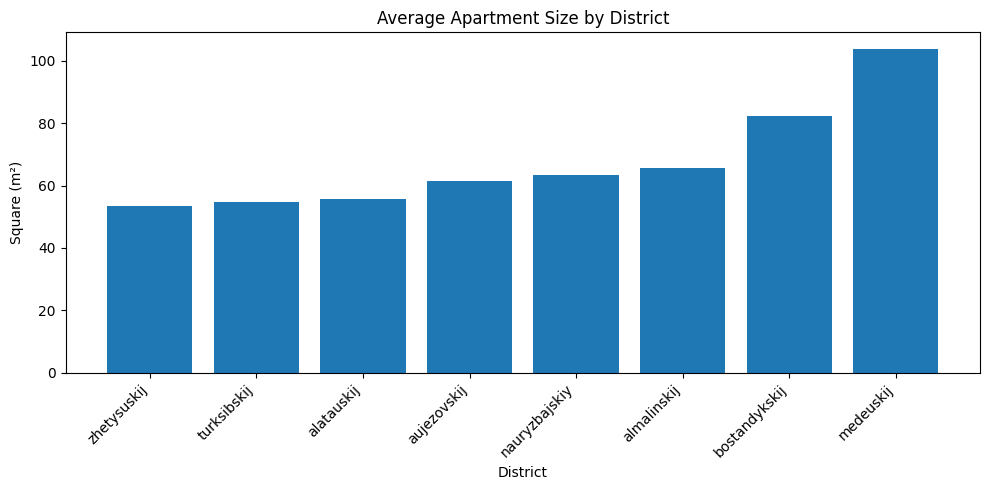

In [13]:
avg_sq = df.groupby('district')['square'].mean().sort_values()
plt.figure(figsize=(10,5))
plt.bar(avg_sq.index, avg_sq.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Apartment Size by District")
plt.xlabel("District")
plt.ylabel("Square (m²)")
plt.tight_layout()
plt.show()

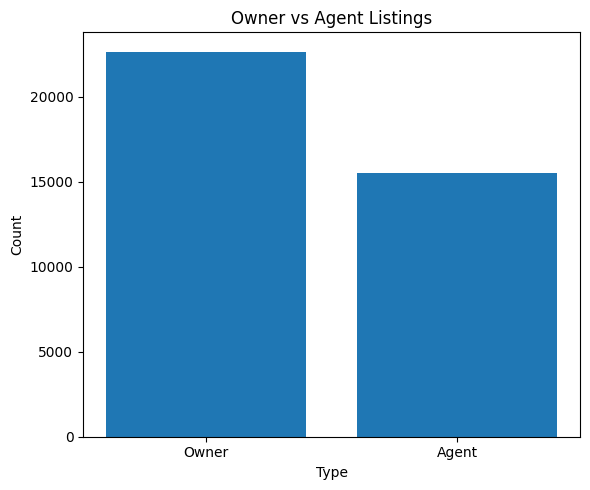

In [14]:
own = df['isOwner'].value_counts()
plt.figure(figsize=(6,5))
plt.bar(['Owner', 'Agent'], own.values)
plt.title("Owner vs Agent Listings")
plt.ylabel("Count")
plt.xlabel("Type")
plt.tight_layout()
plt.show()

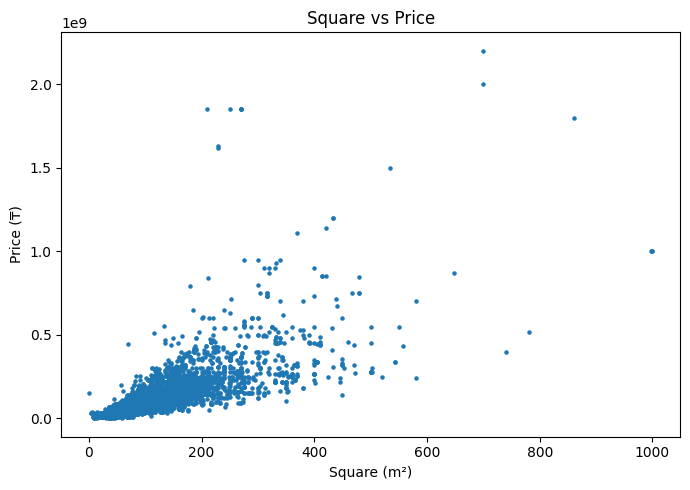

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(df['square'], df['price'], s=5)
plt.title("Square vs Price")
plt.xlabel("Square (m²)")
plt.ylabel("Price (₸)")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['price'].dropna(), bins=50)
plt.title("Price Distribution")
plt.xlabel("Price (₸)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
def safe_counts(column):
    return df[column].fillna("Unknown").value_counts()

counts = safe_counts("flat.toilet_value")
plt.figure(figsize=(7,7))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title("Toilet Type Distribution")
plt.tight_layout()
plt.show()

In [ ]:
counts = safe_counts("flat.door_value")
plt.figure(figsize=(10,5))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Door Type Distribution")
plt.tight_layout()
plt.show()


In [ ]:
counts = safe_counts("inet.type_value")
plt.figure(figsize=(7,7))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title("Internet Type Distribution")
plt.tight_layout()
plt.show()


In [ ]:
counts = safe_counts("flat.parking_value")
plt.figure(figsize=(10,5))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Parking Type Distribution")
plt.tight_layout()
plt.show()


In [ ]:
counts = safe_counts("live.furniture_value")
plt.figure(figsize=(7,7))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title("Furniture Availability")
plt.tight_layout()
plt.show()